In [1]:
# KNN for 400mM ethanol
# Conny Lin | June 11, 2020


In [14]:
import sys, os, pickle, socket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
# enable running in Angular Gyrus
# local variable settings
# check which computer this code is running on
hostname = socket.gethostname()
hostname = hostname.split('.')
hostname = hostname[0]

# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = ['/Users/connylin/Dropbox/Code/proj/brainstation_capstone/']
    datapath = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/nutcracker_sample_1Meach.csv'
elif hostname == 'Angular-Gyrus':
    pylibrary = ['/Users/connylin/Code/proj/brainstation_capstone/']
    datapath = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/nutcracker_sample_1Meach.csv'
else:
    assert False, 'host computer not regonized'

In [4]:
# define local path to the package (can give multiple paths in the list)
# add package paths to system search paths
for path in pylibrary:
    if path not in sys.path:
        sys.path.insert(1, path)
import BrainStationLib

In [6]:
# do standard transformation
from BrainStationLib.ETL.datatransform import Nutcracker

NC = Nutcracker() # same path link between two computers. should be fine without
transform_data = NC.transform_full()

In [7]:
# get data out of dictionary
X_train = transform_data['X_train']
X_test = transform_data['X_test']
y_train = transform_data['y_train']
y_test = transform_data['y_test']

In [6]:
# instantiate and fit the KNN model. Use n_neighbors=3 to demostrate the process


KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)
# Score the model on the test set
test_predictions = KNN_model.predict(X_test)
test_accuracy = accuracy_score(test_predictions, y_test)
print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.795915


In [7]:
train_predictions = KNN_model.predict(X_train)
train_accuracy = accuracy_score(train_predictions, y_train)
print(f"Train set accuracy: {train_accuracy}")

Train set accuracy: 0.889523125


In [15]:
# rough tune
def KNN_tune(X_train, X_test, y_train, y_test, n_neighbors_list):
    
    train_scores = []
    test_scores = []
    for n in n_neighbors_list:
        print(f'running n_neighbors_list = {n}', end='\r')
        KNN_model = KNeighborsClassifier(n_neighbors=n)
        KNN_model.fit(X_train, y_train)
        # Score the model on the test set
        test_scores.append(accuracy_score(KNN_model.predict(X_test), y_test))
        train_scores.append(accuracy_score(KNN_model.predict(X_train), y_train))
    return test_scores, train_scores

In [16]:
n_neighbors_list = range(3, 10)
test_scores, train_scores = KNN_tune(X_train, X_test, y_train, y_test, n_neighbors_list)

No handles with labels found to put in legend.


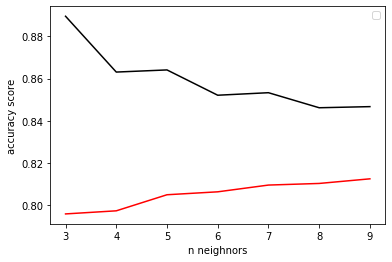

In [17]:
# plot
plt.figure()
plt.plot(n_neighbors_list, train_scores, color='black')
plt.plot(n_neighbors_list, test_scores, color='red')
plt.legend()
plt.xlabel('n neighnors')
plt.ylabel('accuracy score')
plt.show()